In [ ]:
import numpy as np
import pandas as pd

## The Data



In [ ]:
df=pd.read_csv('yelp.csv')

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2.0,5.0,0.0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0.0,0.0,0.0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0.0,1.0,0.0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1.0,2.0,0.0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0.0,0.0,0.0,469


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  6498 non-null   object 
 1   date         6498 non-null   object 
 2   review_id    6498 non-null   object 
 3   stars        6498 non-null   int64  
 4   text         6498 non-null   object 
 5   type         6498 non-null   object 
 6   user_id      6498 non-null   object 
 7   cool         6497 non-null   float64
 8   useful       6497 non-null   float64
 9   funny        6497 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 507.8+ KB


In [ ]:
df.describe()

,stars,cool,useful,funny
count,6498.000000,6497.000000,6497.000000,6497.000000
mean,3.779932,0.904571,1.423888,0.733415
std,1.211465,2.166941,2.425700,1.937059
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,39.000000


In [ ]:
df['text length']=df['text'].apply(len)

# EDA

Let's explore the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: row. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


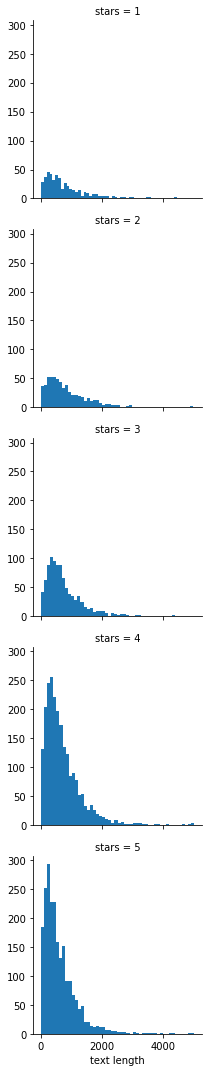

In [ ]:
g=sns.FacetGrid(df,'stars')
g.map(plt.hist,'text length',bins=50)

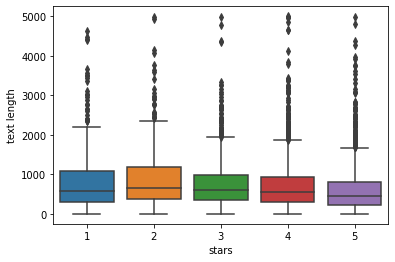

In [ ]:
sns.boxplot(x='stars',y='text length',data=df)

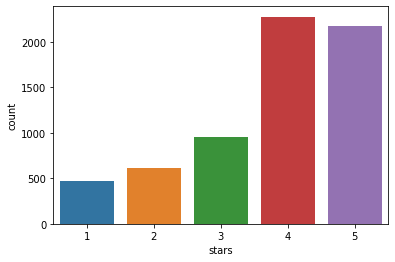

In [ ]:
sns.countplot(x='stars',data=df)

In [ ]:
stars=df.groupby('stars').mean()

In [ ]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.740162,-0.914847,-0.836998
useful,-0.740162,1.000000,0.916318,0.679693
funny,-0.914847,0.916318,1.000000,0.829042
text length,-0.836998,0.679693,0.829042,1.000000


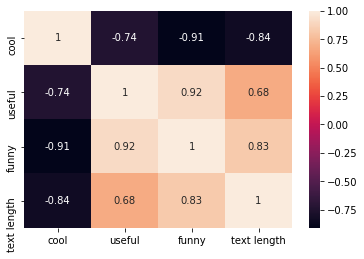

In [ ]:
sns.heatmap(stars.corr(),annot=True)

## NLP Classification Task


In [ ]:
yelp_class=df[(df.stars==1)|(df.stars==5)]

In [ ]:
X=yelp_class['text']
y=yelp_class['stars']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
CV=CountVectorizer()
X=CV.fit_transform(X)

## Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=101)

## Training a Model


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB=MultinomialNB()
NB.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations



In [ ]:
prediction=NB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           1       0.86      0.58      0.69       139
           5       0.92      0.98      0.95       656

    accuracy                           0.91       795
   macro avg       0.89      0.78      0.82       795
weighted avg       0.91      0.91      0.90       795

[[ 80  59]
 [ 13 643]]


# Using Text Processing


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe=Pipeline([('bow',CountVectorizer()),
               ('tfidf',TfidfTransformer()),
               ('classifier',MultinomialNB())])

### Train Test Split

In [ ]:
X=yelp_class['text']
y=yelp_class['stars']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Predictions and Evaluation



In [ ]:
prediction = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       139
           5       0.83      1.00      0.90       656

    accuracy                           0.83       795
   macro avg       0.41      0.50      0.45       795
weighted avg       0.68      0.83      0.75       795

[[  0 139]
 [  0 656]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
